In [2]:
from differences import ATTgt
from matplotlib import pyplot as plt
from analysis_utilities import aggregate_by_time_and_plot, aggregate_by_event_time_and_plot, \
    select_controls, test_balance, add_missing_indicators, prepare_df, generate_variable_names

plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
import pandas as pd

# Store paths.
INPUT_DATA = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/data/03_cleaned/crime_analysis.csv"
OUTPUT_FIGURES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_200m/figures"
OUTPUT_TABLES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_200m/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_csv(INPUT_DATA)

analysis='group_0_crimes_50m'

In [3]:
import numpy as np

value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = generate_variable_names(analysis=analysis)

# Uncomment below line for "any crime" analysis
# df[value_vars_crime] = np.where(df[value_vars_crime] > 0, 1, 0)

In [4]:
covariates_exploration_df = select_controls(df=df, analysis=analysis, output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                            Crime Incidents Within 50m, Oct. 2022   
                                                 \emph{Independent Variable}                                                        
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_0_crimes_50m                                1.447860e-106   
                                                 pre_treatment_change_in_group_0_crimes_50m                          4.944207e-02   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                                  4.680875e-02   
                                                 job_density_2013                                                    8.640309e-09   
                                                 med_hhinc2016                                                       6.205016e-01   
                                                 poor_share2010                                                      5.493570e-01   
                                                 popdensity2010                                                      4.045411e-03   
                                                 rent_twobed2015                                                     2.383444e-06   
                                                 share_white2010                                                     8.270120e-01   
                                                 traveltime15_2010                                                   8.531175e-05   
Panel C: Case Initiation                         for_cause                                                           4.046930e-01   
                                                 no_cause                                                            1.037310e-01   
                                                 non_payment                                                         8.294476e-02   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                                            1.126521e-01   
                                                 hasAttyP                                                            1.173881e-01   
                                                 isEntityD                                                           1.109164e-01   
                                                 isEntityP                                                           5.159225e-03   

                                                                                                               
                                                                                            Plaintiff Victory  
                                                 \emph{Independent Variable}                                   
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_0_crimes_50m             4.852507e-01  
                                                 pre_treatment_change_in_group_0_crimes_50m      4.887942e-01  
Panel B: Census Tract Characteristics            frac_coll_plus2010                              7.782860e-01  
                                                 job_density_2013                                5.178933e-01  
                                                 med_hhinc2016                                   1.224981e-01  
                                                 poor_share2010                                  5.297634e-01  
                                                 popdensity2010                                  6.607443e-03  
                                                 rent_twobed2015                                 1.099251e-02  
                                                 share_white2010                                 6.957519e-01  
                                                 traveltime15_2010                               1.120931e

In [5]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                                   Cases Won by Plaintiff   
Panel A twenty_seventeen_group_0_crimes_50m                      1.427597   
        pre_treatment_change_in_group_0_crimes_50m              -0.051417   
Panel B frac_coll_plus2010                                       0.322882   
        job_density_2013                                     16069.137185   
        popdensity2010                                       23086.043553   
        rent_twobed2015                                       1339.985876   
        traveltime15_2010                                        0.162315   
Panel D isEntityP                                                0.808499   

                                                   Difference in Cases Won by Defendant  \
                                                                             Unweighted   
Panel A twenty_seventeen_group_0_crimes_50m                                    0.060303   
        pre_treatment_change_in_group_0_crimes_50m                             0.050465   
Panel B frac_coll_plus2010                                                     0.002115   
        job_density_2013                                                     926.908698   
        popdensity2010                                                      1225.145069   
        rent_twobed2015                                                      -73.788772   
        traveltime15_2010                                                     -0.008164   
Panel D isEntityP                                                             -0.064959   

                                                                               \
                                                        \emph{p}     Weighted   
Panel A twenty_seventeen_group_0_crimes_50m         4.852507e-01     0.054736   
        pre_treatment_change_in_group_0_crimes_50m  4.887942e-01     0.039364   
Panel B frac_coll_plus2010                          7.782860e-01     0.025147   
        job_density_2013                            5.178933e-01  1970.659297   
        popdensity2010                              6.607443e-03   -54.746196   
        rent_twobed2015                             1.099251e-02   -49.817070   
        traveltime15_2010                           1.120931e-02    -0.017693   
Panel D isEntityP                                   2.625077e-07    -0.062153   

                                                              
                                                    \emph{p}  
Panel A twenty_seventeen_group_0_crimes_50m         0.616698  
        pre_treatment_change_in_group_0_crimes_50m  0.702478  
Panel B frac_coll_plus2010                          0.017720  
        job_density_2013                            0.342673  
        popdensity2010                              0.936150  
        rent_twobed2015                             0.244987  
        traveltime15_2010                           0.000295  
Panel D isEntityP                                   0.000620

In [6]:
# Store treatment date variable -- may be either file_date or latest_docket_date -- and drop rows where missing.
treatment_date_variable = 'file_date'
treatment_month_variable = treatment_date_variable.replace('date', 'month')

missing_indicators = []

# Prepare df for use with the differences package.
df = prepare_df(df, analysis, treatment_date_variable, pre_treatment_covariates, missing_indicators, value_vars_crime, month_to_int_dictionary)

In [7]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 2184/2184 [00:18<00:00, 120.26it/s]


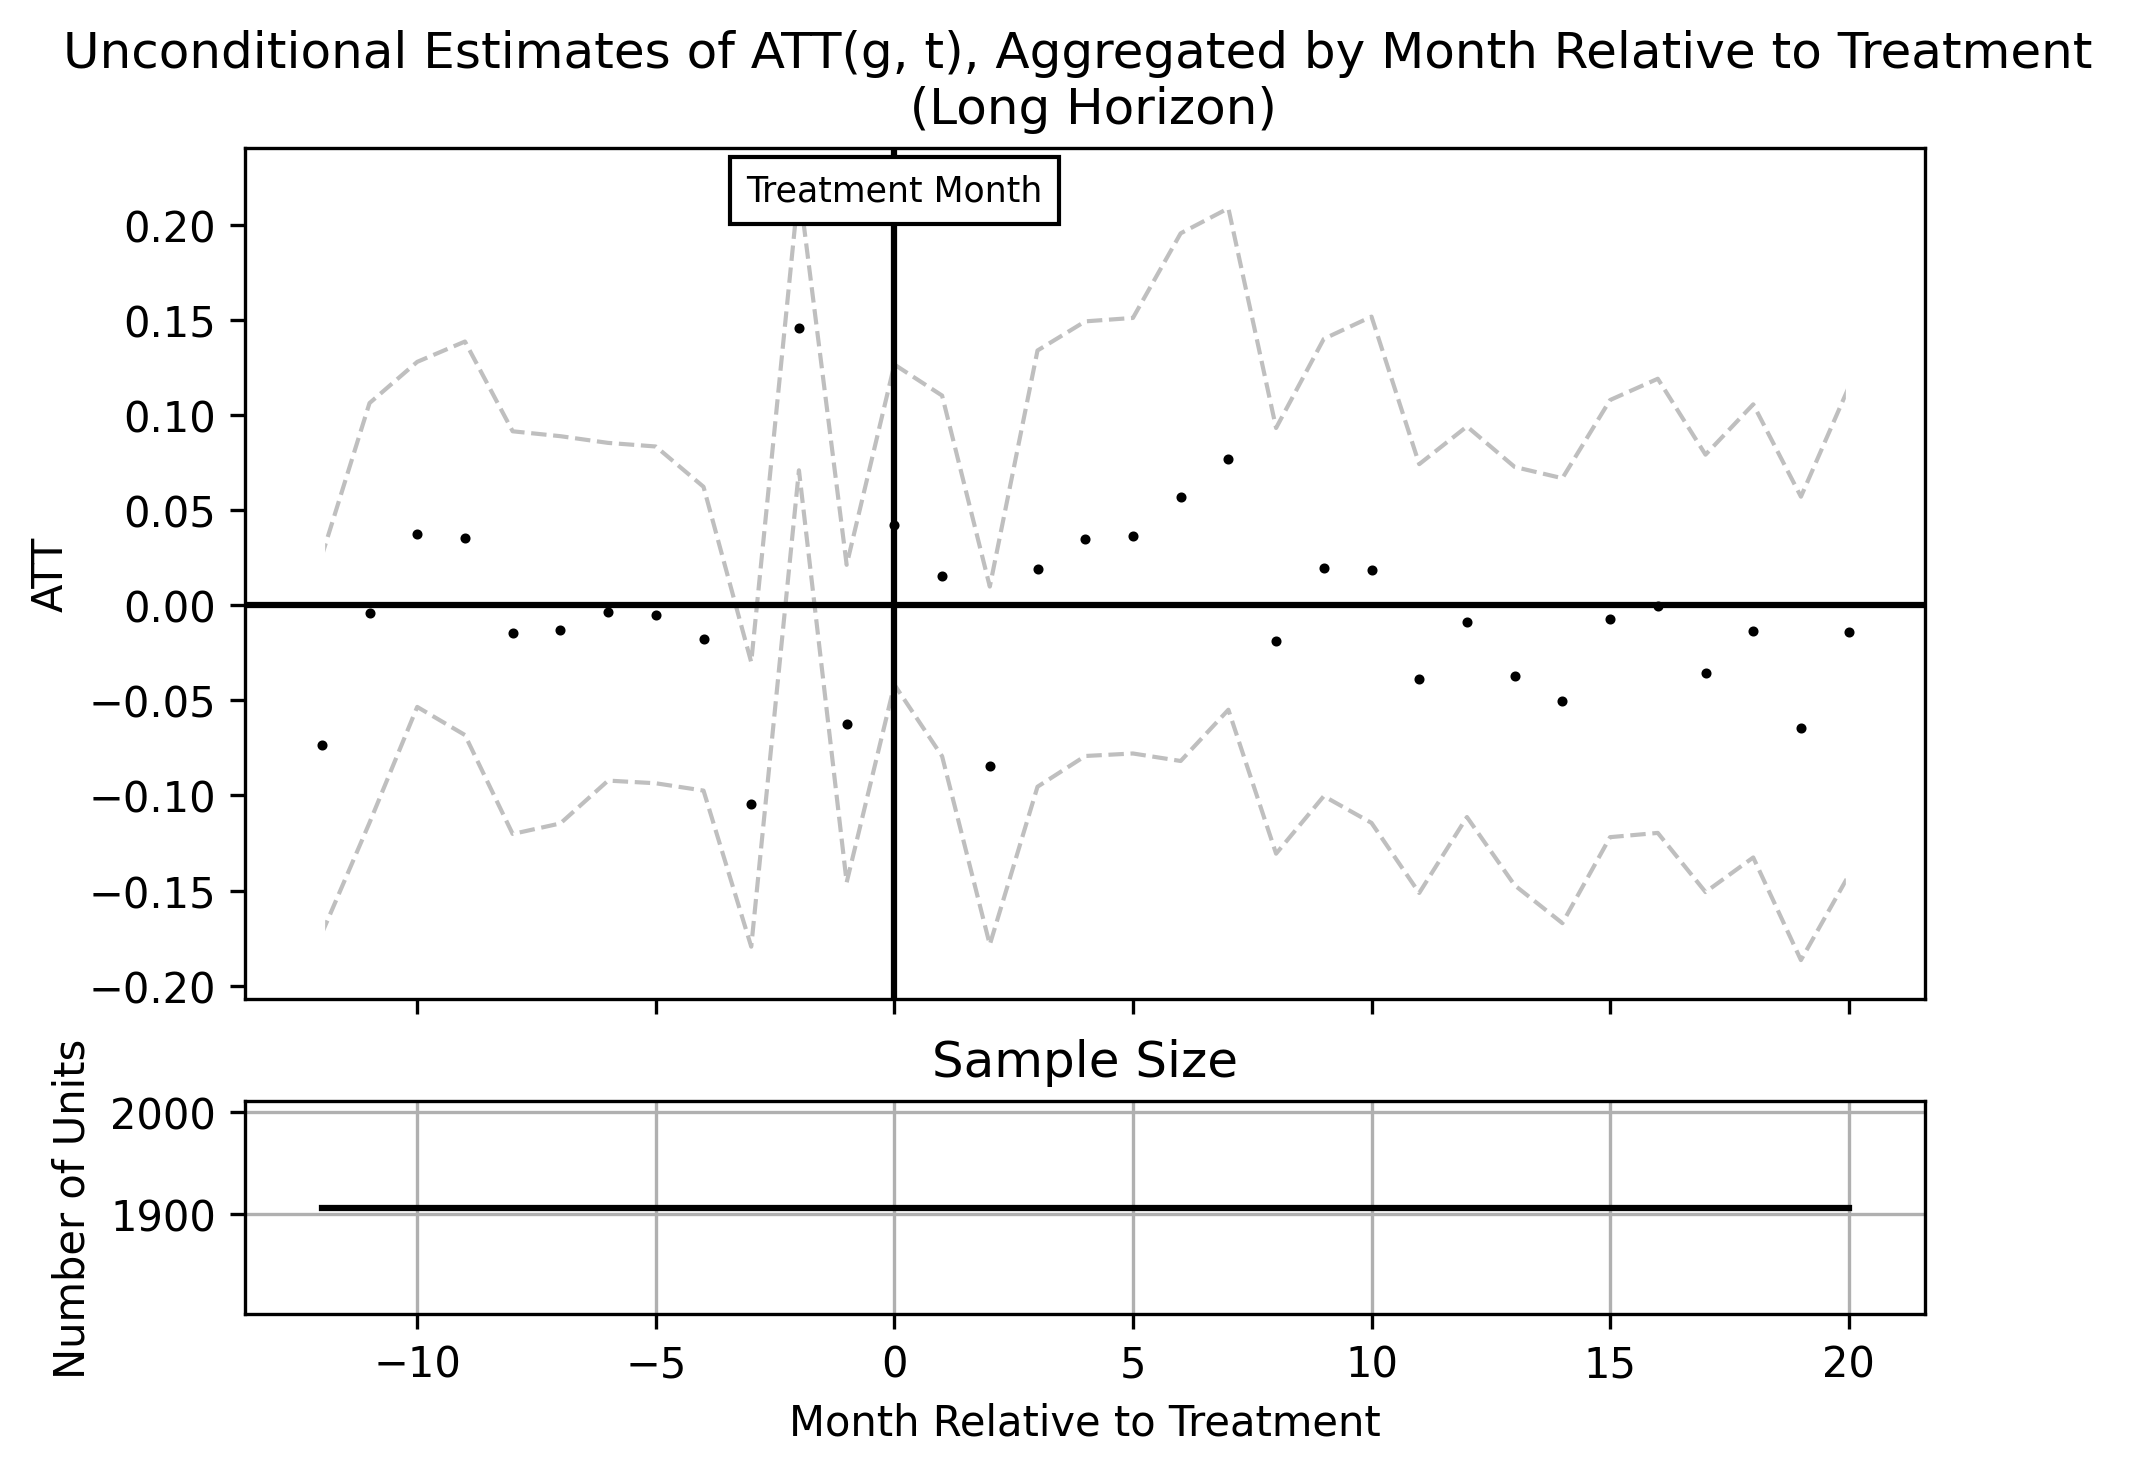

In [8]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-12, end_period=20,
                                 title="Unconditional Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

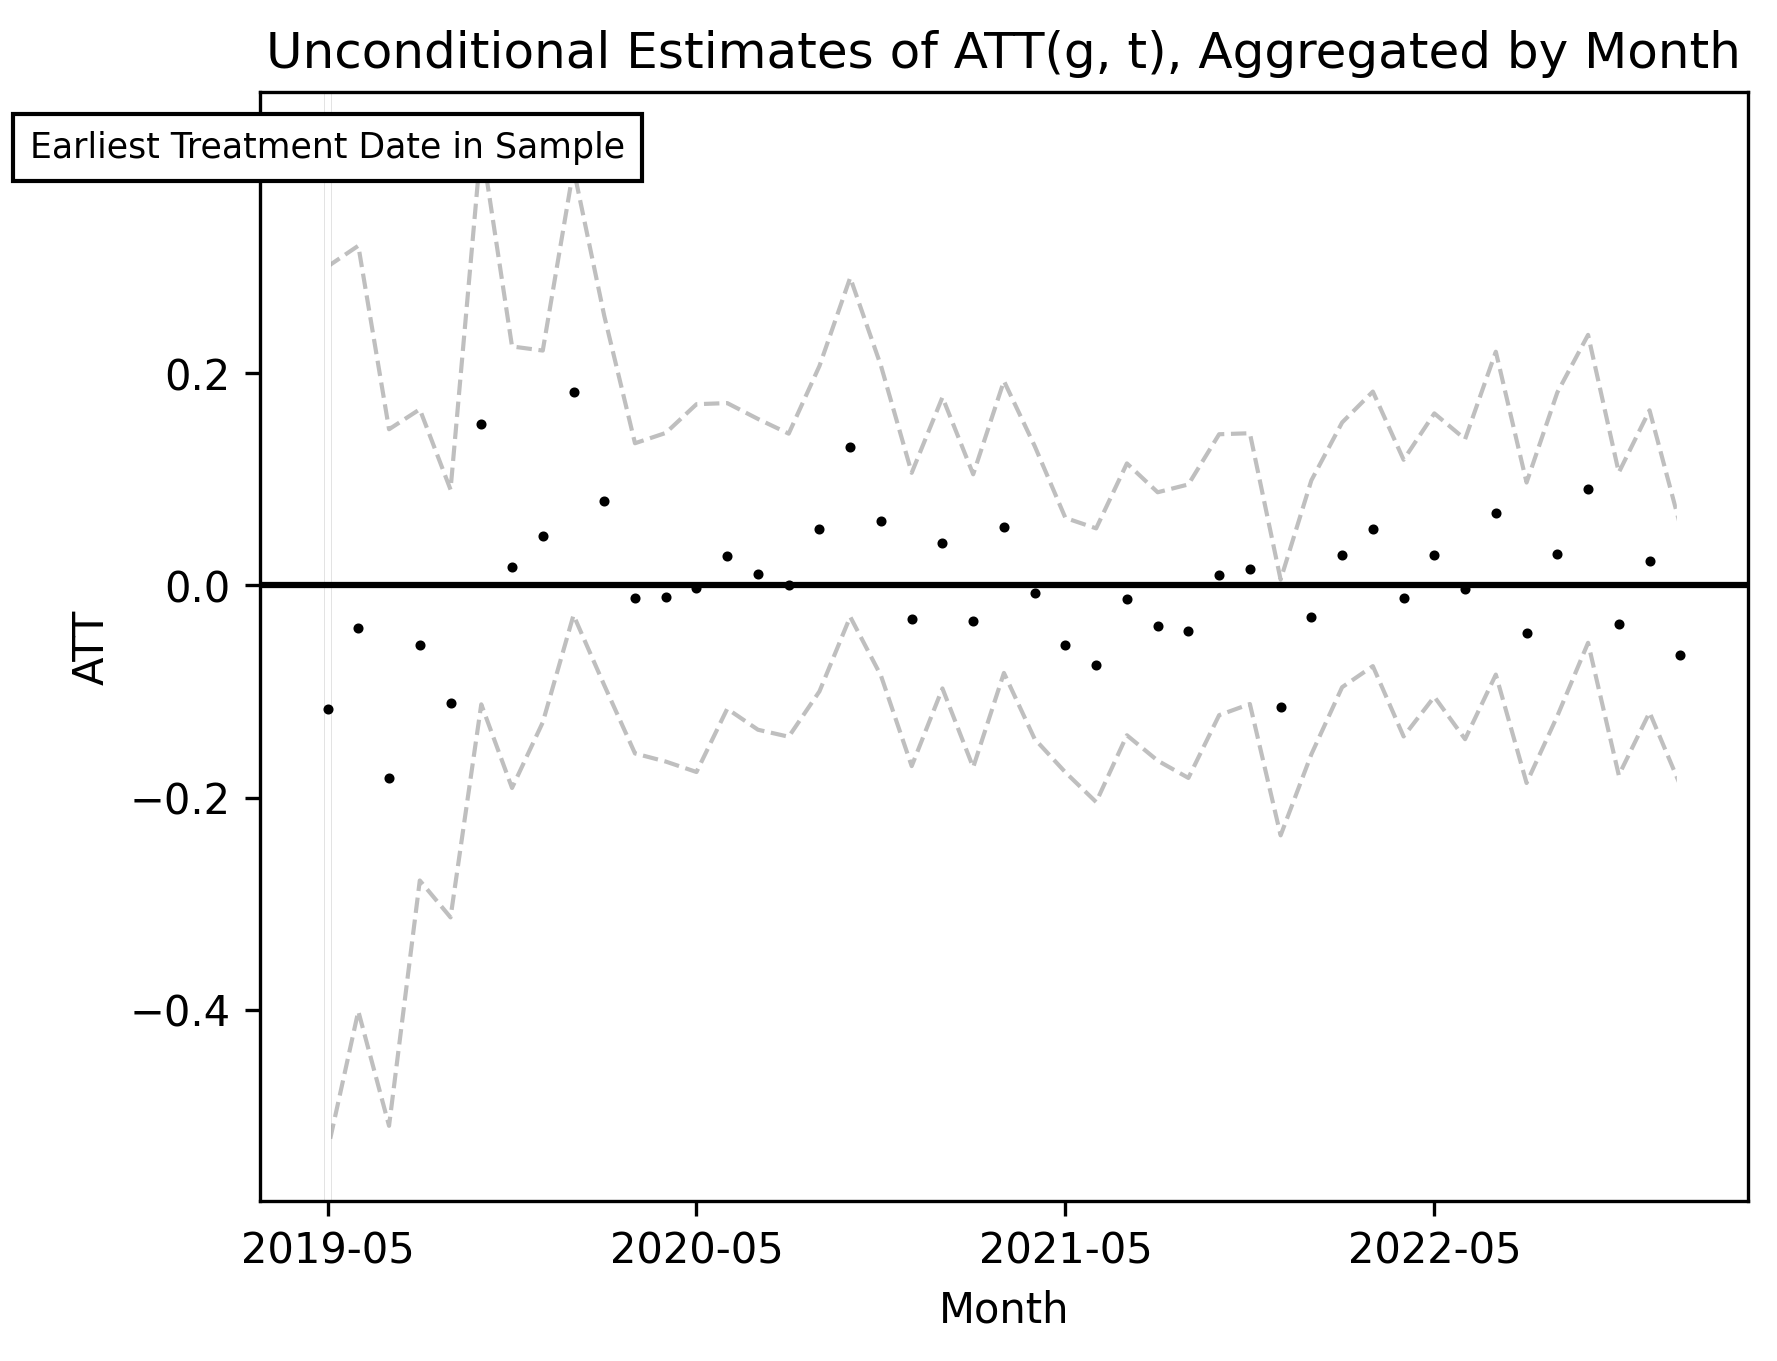

In [9]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="Unconditional Estimates of ATT(g, t), Aggregated by Month")

In [10]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]   49%|█████████▊          | 1072/2184 [00:10<00:08, 134.23it/s]/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow enco

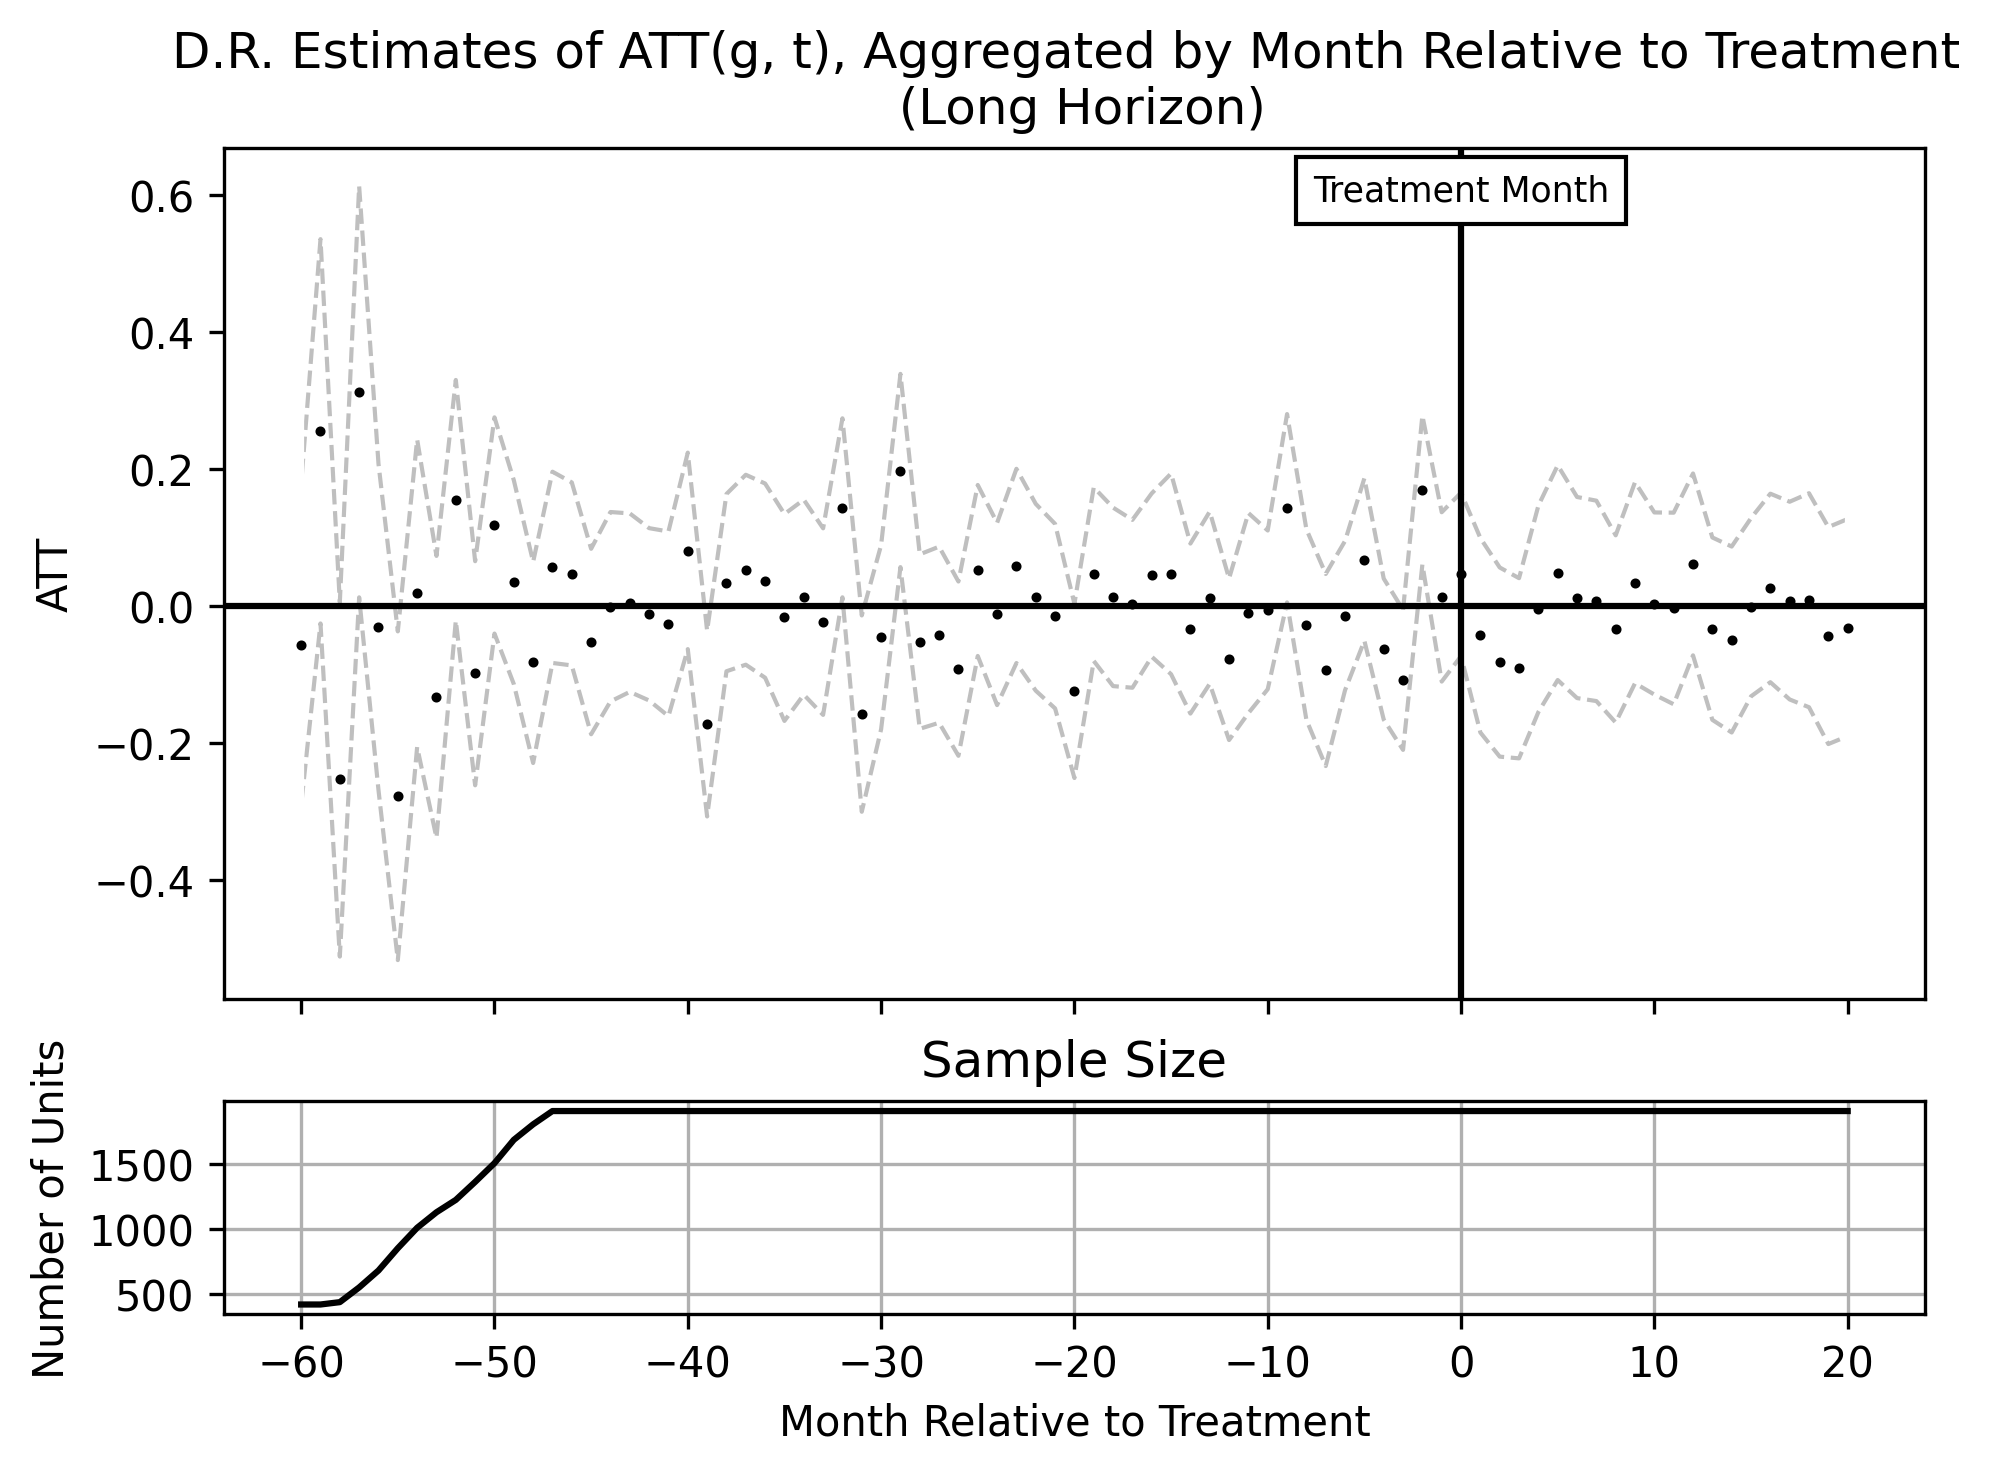

In [11]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-60,
                                 end_period=20,
                                 title="D.R. Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

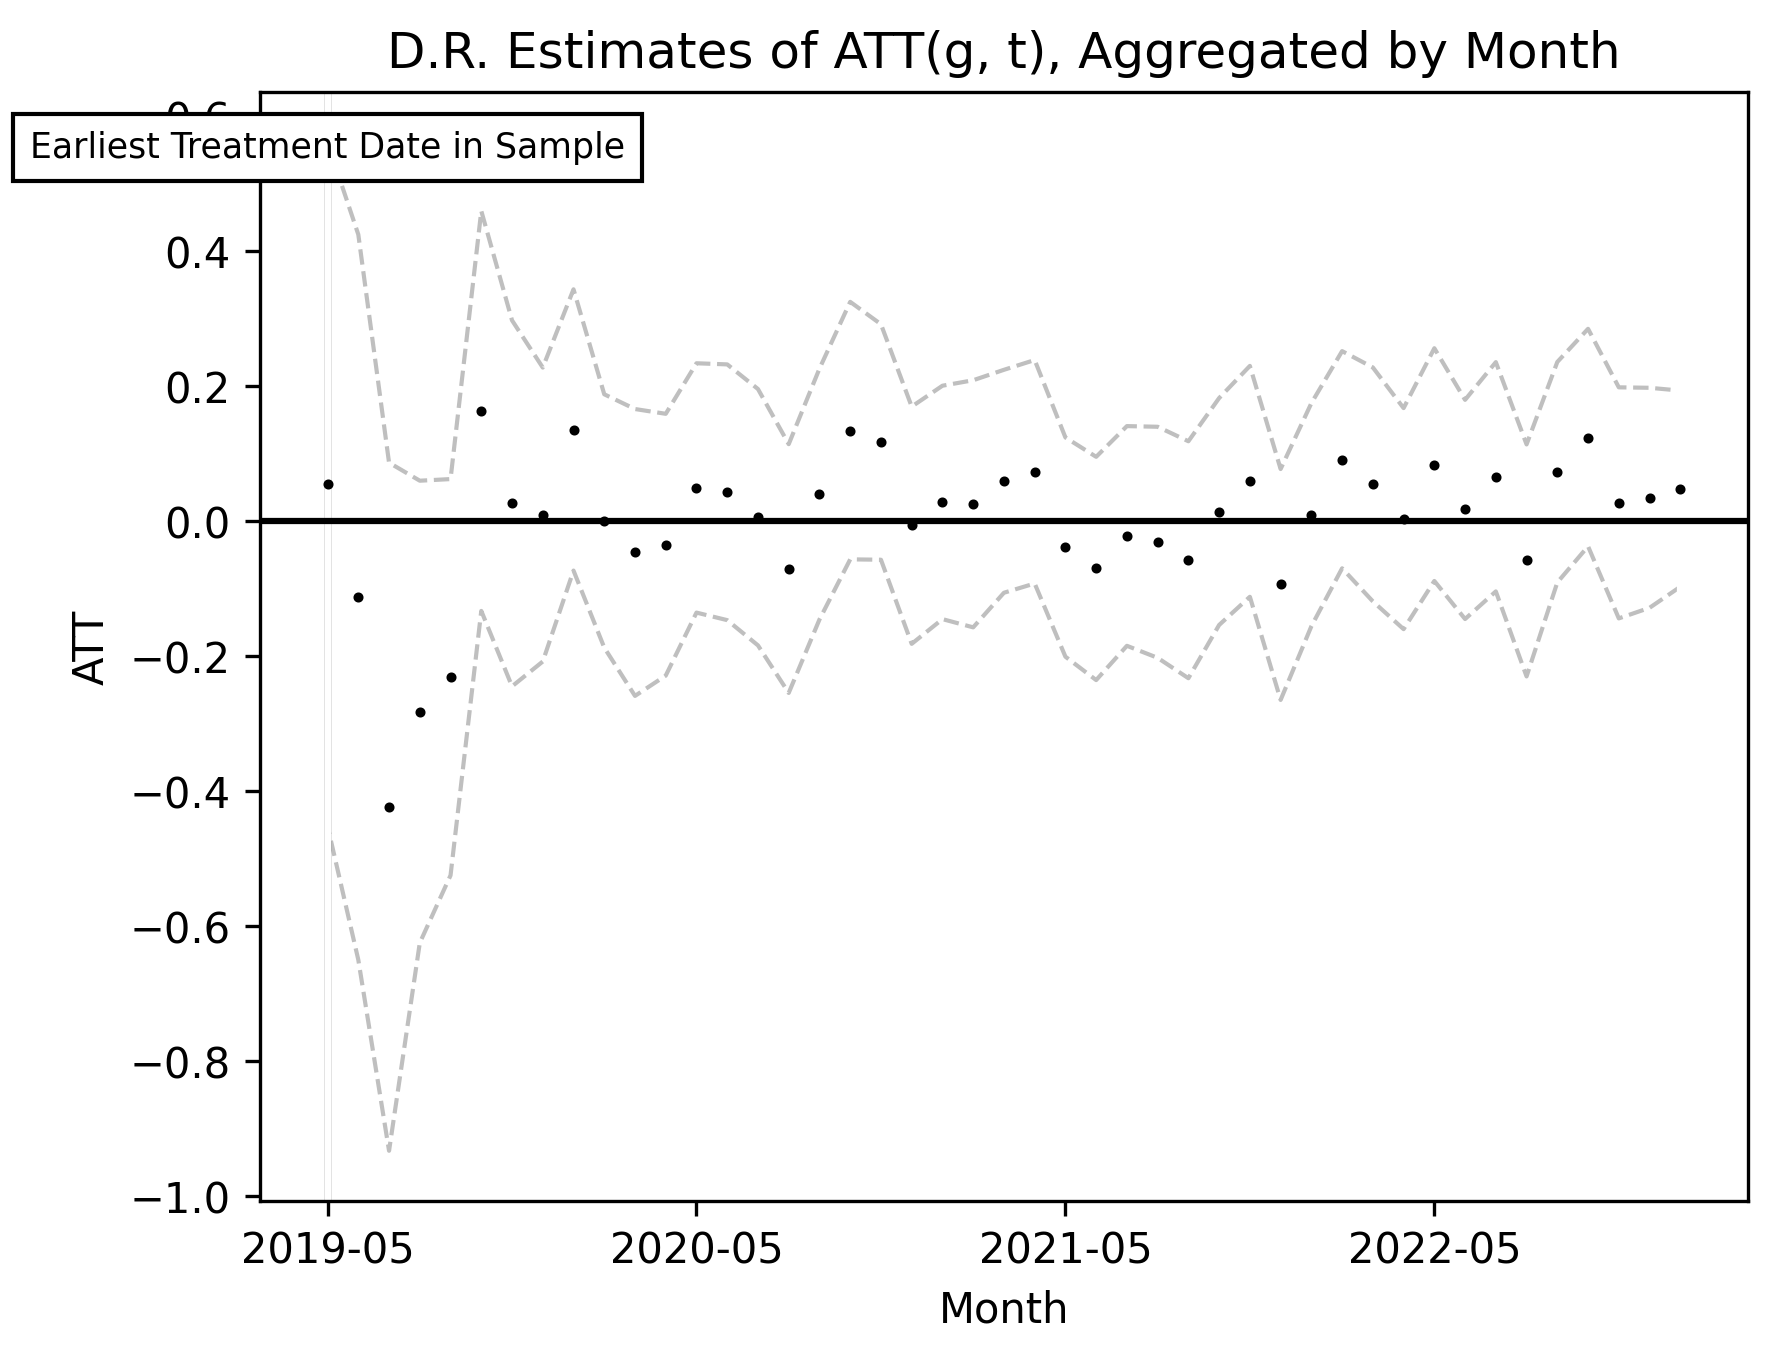

In [12]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="D.R. Estimates of ATT(g, t), Aggregated by Month")